In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ultranest
import read_beam_FEKO as rf
from ultranest.plot import cornerplot
import scipy.interpolate
import scipy.optimize
%matplotlib notebook

In [2]:
o = rf.read_beam_FEKO('nominal.out',0)

 Frequency in Hz:               FREQ =    2.50000E+07

 Frequency in Hz:               FREQ =    2.60000E+07

 Frequency in Hz:               FREQ =    2.70000E+07

 Frequency in Hz:               FREQ =    2.80000E+07

 Frequency in Hz:               FREQ =    2.90000E+07

 Frequency in Hz:               FREQ =    3.00000E+07

 Frequency in Hz:               FREQ =    3.10000E+07

 Frequency in Hz:               FREQ =    3.20000E+07

 Frequency in Hz:               FREQ =    3.30000E+07

 Frequency in Hz:               FREQ =    3.40000E+07

 Frequency in Hz:               FREQ =    3.50000E+07

 Frequency in Hz:               FREQ =    3.60000E+07

 Frequency in Hz:               FREQ =    3.70000E+07

 Frequency in Hz:               FREQ =    3.80000E+07

 Frequency in Hz:               FREQ =    3.90000E+07

 Frequency in Hz:               FREQ =    4.00000E+07

 Frequency in Hz:               FREQ =    4.10000E+07

 Frequency in Hz:               FREQ =    4.20000E+07

 Frequency

In [24]:
theta = 90 - o[2]
phi = o[1]
freq = o[0]
gain = o[5]
theta, phi = np.meshgrid(theta, phi)

In [4]:
def Gaussian2D(A, sigx, sigy):
    return A * np.exp(-(theta*np.pi/180*np.cos(phi*np.pi/180))**2/2/sigx**2 - (theta*np.pi/180*np.sin(phi*np.pi/180))**2/2/sigy**2)
# Define model to simulate data
def model1(paras):
    A, sigx, sigy = paras
    return Gaussian2D(A,sigx,sigy).T

In [29]:
def simu(ddd):
    sigma = np.std(ddd)
    param_names = ['A', 'sigx', 'sigy']
    def my_prior_transform(cube):
        params = cube.copy()

        # transform location parameter: uniform prior
        lo = 0
        hi = 10
        params[0] = cube[0] * (hi - lo) + lo

        lo = 0
        hi = 2
        params[1] = cube[1] * (hi - lo) + lo

        lo = 0
        hi = 2
        params[1] = cube[1] * (hi - lo) + lo

        return params
    def my_likelihood(params):
        mo = model1(params)
        diff = ddd - mo
        return -0.5 * np.sum((diff/sigma)**2)
    sampler = ultranest.ReactiveNestedSampler(param_names, my_likelihood, my_prior_transform)
    result = sampler.run(min_num_live_points=200)
    sampler.print_results()
    return result

In [43]:
def calsig(ddd):
    result = simu(ddd)
    A = np.mean(result['samples'].T[0])
    sigx = np.mean(result['samples'].T[1])
    sigy = np.mean(result['samples'].T[2])
    ratio = sigy/sigx
    return [A,sigx,sigy,ratio]

In [58]:
def plotdgr(ddd):
    x = np.cos(phi*np.pi/180)*np.sin(theta*np.pi/180)
    y = np.sin(phi*np.pi/180)*np.sin(theta*np.pi/180)
    A, sigx,sigy,ratio = calsig(ddd)
    fig, axs = plt.subplots(1, 3,figsize = (10,3),sharex = 'all', sharey = 'all')
    axs[0].scatter(x,y,c = ddd.T)
    axs[1].scatter(x,y,c = model1([A,sigx,sigy]).T)
    axs[2].scatter(x,y,c = ddd.T - model1([A,sigx,sigy]).T)
    fig.colorbar(plt.scatter(x,y,c = ddd.T - model1([A,sigx,sigy]).T))

In [156]:
A,sigx,sigy,ratio = calsig(gain[99])

[ultranest] Sampling 200 live points from prior ...


[ultranest] Explored until L=-2e+02  .29 [-174.3427..-174.3423]*| it/evals=3880/7823 eff=50.8986% N=200   0   
[ultranest] Likelihood function evaluations: 7855
[ultranest]   logZ = -189.2 +- 0.1587
[ultranest] Effective samples strategy satisfied (ESS = 937.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.16, need <0.5)
[ultranest]   logZ error budget: single: 0.26 bs:0.16 tail:0.01 total:0.16 required:<0.50
[ultranest] done iterating.

logZ = -189.207 +- 0.391
  single instance: logZ = -189.207 +- 0.259
  bootstrapped   : logZ = -189.203 +- 0.391
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    A                   : 5.013 │ ▁   ▁▁▁▁▁▁▁▁▂▃▄▄▄▆▅▇▆▆▅▄▄▃▂▁▁▁▁▁▁▁▁ ▁ │5.222     5.124 +- 0.023
    sigx                : 0.3076│ ▁  ▁▁▁▁▁▂▂▁▃▃▄▆▆▇▇▆▇▇▅▄▄▃▂▂▂▂▁▁▁▁▁▁ ▁ │0.3261    0.3167 +- 0.0023
    sigy               

[ultranest] Sampling 200 live points from prior ...


[ultranest] Explored until L=-2e+02  .28 [-177.3445..-177.3444]*| it/evals=3920/8002 eff=50.2435% N=200 0     
[ultranest] Likelihood function evaluations: 8009
[ultranest]   logZ = -192.4 +- 0.1698
[ultranest] Effective samples strategy satisfied (ESS = 929.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest]   logZ error budget: single: 0.26 bs:0.17 tail:0.01 total:0.17 required:<0.50
[ultranest] done iterating.

logZ = -192.345 +- 0.281
  single instance: logZ = -192.345 +- 0.260
  bootstrapped   : logZ = -192.381 +- 0.280
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    A                   : 5.054 │ ▁  ▁▁▁▁▁▂▂▃▄▄▄▅▇▇▆▆▆▅▅▃▂▂▁▁▁▁▁▁▁ ▁▁ ▁ │5.252     5.145 +- 0.023
    sigx                : 0.3063│ ▁▁▁▁▁▁▁▂▂▃▃▄▅▄▅▆▆▇▆▆▆▅▃▄▃▃▂▁▁▁▁▁▁ ▁ ▁ │0.3241    0.3147 +- 0.0024
    sigy               

<IPython.core.display.Javascript object>


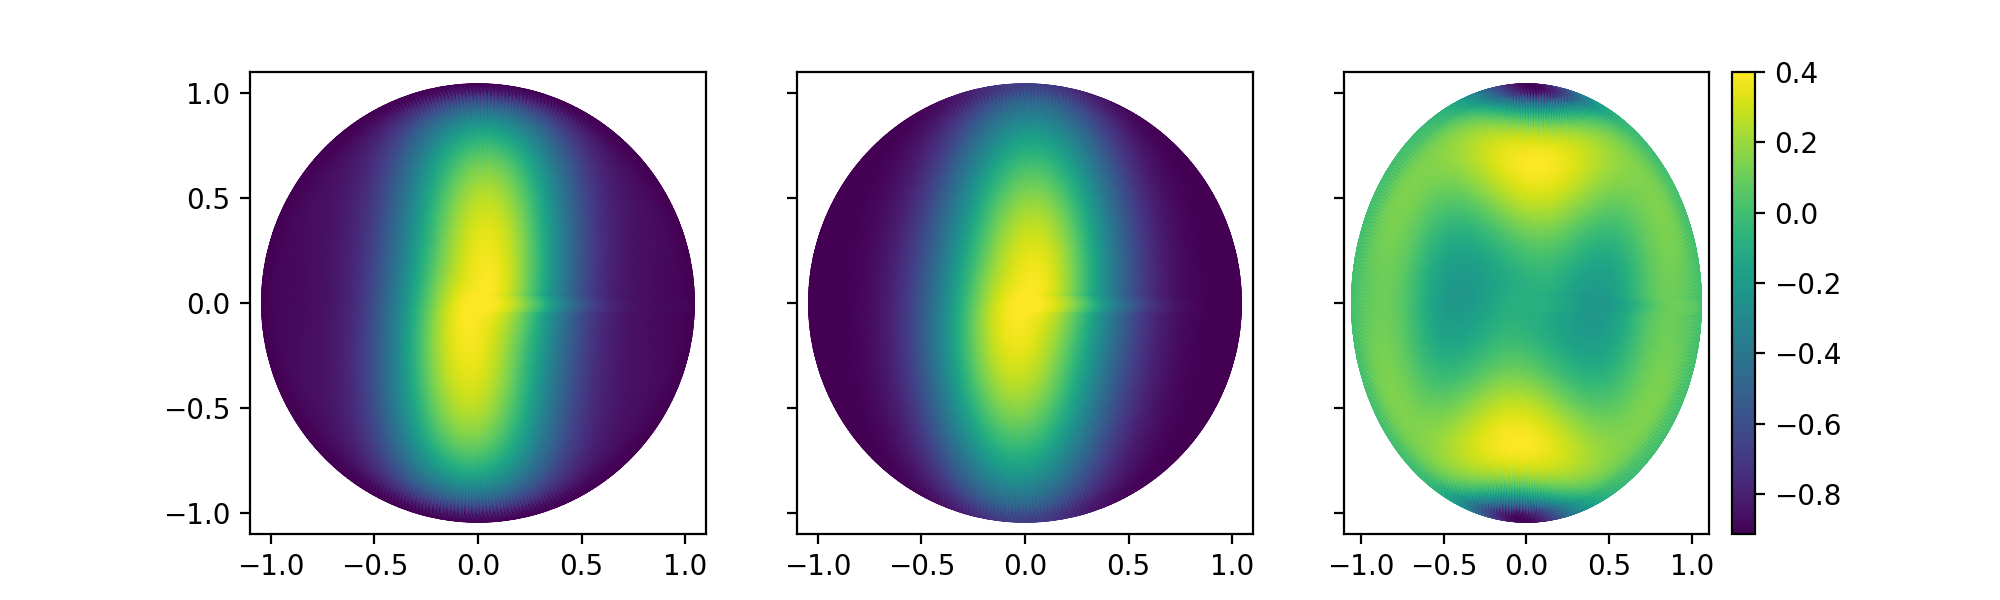

In [123]:
#125 MHz
plotdgr(gain[100])

In [101]:
#with change of axis, divide y with sigy/sigx
sigma = 0.6611*180/np.pi
ratio = 0.7029/0.6611
#make sigma a input parameter
def Acos(R, theta, miu, nu):
    part1 = np.cos(miu*theta*np.pi/180)*(R/(sigma/1.43))**miu
    part2 = P(miu,nu,R**2/(sigma/1.43)**2)
    part3 = np.exp(-R**2/(4*(sigma/1.43)**2))
    return part1*part2*part3

def Asin(R, theta, miu, nu):
    part1 = np.sin(miu*theta*np.pi/180)*(R/(sigma/1.43))**miu
    part2 = P(miu,nu,R**2/(sigma/1.43)**2)
    part3 = np.exp(-R**2/(4*(sigma/1.43)**2))
    return part1*part2*part3
    
def P(miu,nu,u):
    terms = []
    p = 0
    while p <= nu:
        up = np.math.factorial(miu + nu)*np.math.factorial(nu)
        down = np.math.factorial(miu + p)*np.math.factorial(p)*np.math.factorial(nu-p)
        term = (-2)**(nu-p)* up/down * u**p
        terms.append(term)
        p += 1
    terms = np.array(terms)
    return np.sum(terms,axis = 0)

#Normalization
def normalize(array):
    q = 0
    theta = 0
    while theta <= 90:
        for i in range(360):
            q += (array[theta*360 + i])**2 * (np.pi/180)**2 * np.sin(theta*np.pi/180)
        theta += 1
    return array/q

def TDH(rank):
    """return matrix A = [f1, f2, f3, ...] for rank 0 to rank TDH functions"""
    zz00c = Acos(theta, phi/ratio, 0, 0)
    zz00c2d = zz00c.flatten()
    array = normalize(zz00c2d)
    r = 1
    while r <= rank:
        m = 0
        while m <= r:
            if (r - m)%2 == 0:
                n = (r - m)/2
                if m == 0:
                    cosine = Acos(theta,phi/ratio,m,n)
                    cosine2d = cosine.flatten()
                    ncos = normalize(cosine2d)
                    array = np.vstack((array, ncos))
                    m += 2
                else:
                    cosine = Acos(theta,phi/ratio,m,n)
                    cosine2d = cosine.flatten()
                    ncos = normalize(cosine2d)
                    sine = Asin(theta,phi/ratio,m,n)
                    sine2d = sine.flatten()
                    nsin = normalize(sine2d)
                    array = np.vstack((array, ncos))
                    array = np.vstack((array, nsin))
                    m += 2
            else:
                m += 1
        r += 1
    matrix = np.matrix(array).T
    return matrix

def model(rank, coe):
    A = TDH(rank)
    a = np.matrix(coe).T
    return np.matmul(A,a)

def simulation(coe, sigma):
    rank = 0
    count = 1
    length = len(coe) - 1
    while length > count:
        rank += 1
        count += rank + 1
    mo = model(rank,coe)
    noise = np.random.default_rng().normal(0.0, sigma*np.max(mo),360*91)
    noi = np.matrix(noise).T
    data = mo + noi
    return data

def solve(A, data):
    AT = A.T
    ATA = np.matmul(AT,A)
    ATAinverse = np.linalg.inv(ATA)
    half = np.matmul(ATAinverse,AT)
    x = np.matmul(half,data)
    return x

def residual(A,data):
    x = solve(A, data)
    AT = A.T
    fittingmodel = np.matmul(A, x)
    r = data - fittingmodel
    return r

def residual2D(A,data):
    r = residual(A,data)
    r2D = r.reshape(360,91)
    return r2D

def covariance(A,data):
    AT = A.T
    ATA = np.matmul(AT,A)
    ATAinverse = np.linalg.inv(ATA)
    r = residual(A,data)
    rT = r.T
    rTr = np.matmul(rT,r)
    s = rTr/((len(data))-10)
    s2 = s.item(0)
    covariance = s2*ATAinverse
    return covariance

y = cos(phi) theta
x = phi theta
y'= phi' theta'
x' = phi' theta'
y' = y

In [176]:
#with change of axis, changing phi and theta using trignomitry
sigma = 0.6611*180/np.pi
ratio = 0.7029/0.6611
newphi = np.arctan(np.tan(phi*np.pi/180)/ratio)*180/np.pi
newtheta = np.arcsin(np.cos(phi*np.pi/180)*np.sin(theta*np.pi/180)/np.cos(newphi*np.pi/180))*180/np.pi
#make sigma a input parameter
def Acos(R, theta, miu, nu):
    part1 = np.cos(miu*theta*np.pi/180)*(R/(sigma/1.43))**miu
    part2 = P(miu,nu,R**2/(sigma/1.43)**2)
    part3 = np.exp(-R**2/(4*(sigma/1.43)**2))
    return part1*part2*part3

def Asin(R, theta, miu, nu):
    part1 = np.sin(miu*theta*np.pi/180)*(R/(sigma/1.43))**miu
    part2 = P(miu,nu,R**2/(sigma/1.43)**2)
    part3 = np.exp(-R**2/(4*(sigma/1.43)**2))
    return part1*part2*part3
    
def P(miu,nu,u):
    terms = []
    p = 0
    while p <= nu:
        up = np.math.factorial(miu + nu)*np.math.factorial(nu)
        down = np.math.factorial(miu + p)*np.math.factorial(p)*np.math.factorial(nu-p)
        term = (-2)**(nu-p)* up/down * u**p
        terms.append(term)
        p += 1
    terms = np.array(terms)
    return np.sum(terms,axis = 0)

#Normalization
def normalize(array):
    q = 0
    theta = 0
    while theta <= 90:
        for i in range(360):
            q += (array[theta*360 + i])**2 * (np.pi/180)**2 * np.sin(theta*np.pi/180)
        theta += 1
    return array/q

def TDH(rank):
    """return matrix A = [f1, f2, f3, ...] for rank 0 to rank TDH functions"""
    zz00c = Acos(newtheta, newphi*ratio, 0, 0)
    zz00c2d = zz00c.flatten()
    array = normalize(zz00c2d)
    r = 1
    while r <= rank:
        m = 0
        while m <= r:
            if (r - m)%2 == 0:
                n = (r - m)/2
                if m == 0:
                    cosine = Acos(newtheta,newphi,m,n)
                    cosine2d = cosine.flatten()
                    ncos = normalize(cosine2d)
                    array = np.vstack((array, ncos))
                    m += 2
                else:
                    cosine = Acos(newtheta,newphi,m,n)
                    cosine2d = cosine.flatten()
                    ncos = normalize(cosine2d)
                    sine = Asin(newtheta,newphi,m,n)
                    sine2d = sine.flatten()
                    nsin = normalize(sine2d)
                    array = np.vstack((array, ncos))
                    array = np.vstack((array, nsin))
                    m += 2
            else:
                m += 1
        r += 1
    matrix = np.matrix(array).T
    return matrix

def model(rank, coe):
    A = TDH(rank)
    a = np.matrix(coe).T
    return np.matmul(A,a)

def simulation(coe, sigma):
    rank = 0
    count = 1
    length = len(coe) - 1
    while length > count:
        rank += 1
        count += rank + 1
    mo = model(rank,coe)
    noise = np.random.default_rng().normal(0.0, sigma*np.max(mo),360*91)
    noi = np.matrix(noise).T
    data = mo + noi
    return data

def solve(A, data):
    AT = A.T
    ATA = np.matmul(AT,A)
    ATAinverse = np.linalg.inv(ATA)
    half = np.matmul(ATAinverse,AT)
    x = np.matmul(half,data)
    return x

def residual(A,data):
    x = solve(A, data)
    AT = A.T
    fittingmodel = np.matmul(A, x)
    r = data - fittingmodel
    return r

def residual2D(A,data):
    r = residual(A,data)
    r2D = r.reshape(360,91)
    return r2D

def covariance(A,data):
    AT = A.T
    ATA = np.matmul(AT,A)
    ATAinverse = np.linalg.inv(ATA)
    r = residual(A,data)
    rT = r.T
    rTr = np.matmul(rT,r)
    s = rTr/((len(data))-10)
    s2 = s.item(0)
    covariance = s2*ATAinverse
    return covariance

In [91]:
#Without change
sigma = 0.3147*180/np.pi
#make sigma a input parameter
def Acos(R, theta, miu, nu):
    part1 = np.cos(miu*theta*np.pi/180)*(R/(sigma/1.43))**miu
    part2 = P(miu,nu,R**2/(sigma/1.43)**2)
    part3 = np.exp(-R**2/(4*(sigma/1.43)**2))
    return part1*part2*part3

def Asin(R, theta, miu, nu):
    part1 = np.sin(miu*theta*np.pi/180)*(R/(sigma/1.43))**miu
    part2 = P(miu,nu,R**2/(sigma/1.43)**2)
    part3 = np.exp(-R**2/(4*(sigma/1.43)**2))
    return part1*part2*part3
    
def P(miu,nu,u):
    terms = []
    p = 0
    while p <= nu:
        up = np.math.factorial(miu + nu)*np.math.factorial(nu)
        down = np.math.factorial(miu + p)*np.math.factorial(p)*np.math.factorial(nu-p)
        term = (-2)**(nu-p)* up/down * u**p
        terms.append(term)
        p += 1
    terms = np.array(terms)
    return np.sum(terms,axis = 0)

#Normalization
def normalize(array):
    q = 0
    theta = 0
    while theta <= 90:
        for i in range(360):
            q += (array[theta*360 + i])**2 * (np.pi/180)**2 * np.sin(theta*np.pi/180)
        theta += 1
    return array/q

def TDH(rank):
    """return matrix A = [f1, f2, f3, ...] for rank 0 to rank TDH functions"""
    zz00c = Acos(theta, phi, 0, 0)
    zz00c2d = zz00c.flatten()
    array = normalize(zz00c2d)
    r = 1
    while r <= rank:
        m = 0
        while m <= r:
            if (r - m)%2 == 0:
                n = (r - m)/2
                if m == 0:
                    cosine = Acos(theta,phi,m,n)
                    cosine2d = cosine.flatten()
                    ncos = normalize(cosine2d)
                    array = np.vstack((array, ncos))
                    m += 2
                else:
                    cosine = Acos(theta,phi,m,n)
                    cosine2d = cosine.flatten()
                    ncos = normalize(cosine2d)
                    sine = Asin(theta,phi,m,n)
                    sine2d = sine.flatten()
                    nsin = normalize(sine2d)
                    array = np.vstack((array, ncos))
                    array = np.vstack((array, nsin))
                    m += 2
            else:
                m += 1
        r += 1
    matrix = np.matrix(array).T
    return matrix

def model(rank, coe):
    A = TDH(rank)
    a = np.matrix(coe).T
    return np.matmul(A,a)

def simulation(coe, sigma):
    rank = 0
    count = 1
    length = len(coe) - 1
    while length > count:
        rank += 1
        count += rank + 1
    mo = model(rank,coe)
    noise = np.random.default_rng().normal(0.0, sigma*np.max(mo),360*91)
    noi = np.matrix(noise).T
    data = mo + noi
    return data

def solve(A, data):
    AT = A.T
    ATA = np.matmul(AT,A)
    ATAinverse = np.linalg.inv(ATA)
    half = np.matmul(ATAinverse,AT)
    x = np.matmul(half,data)
    return x

def residual(A,data):
    x = solve(A, data)
    AT = A.T
    fittingmodel = np.matmul(A, x)
    r = data - fittingmodel
    return r

def residual2D(A,data):
    r = residual(A,data)
    r2D = r.reshape(360,91)
    return r2D

def covariance(A,data):
    AT = A.T
    ATA = np.matmul(AT,A)
    ATAinverse = np.linalg.inv(ATA)
    r = residual(A,data)
    rT = r.T
    rTr = np.matmul(rT,r)
    s = rTr/((len(data))-10)
    s2 = s.item(0)
    covariance = s2*ATAinverse
    return covariance

In [109]:
TDH20 = TDH(20)

In [177]:
TDH20.shape

(32760, 231)

In [110]:
TDHcube = []
count = 0
for i in range(20):
    TDHcube.append(TDH20[:,:(count+i+1)])
    count += i+1

In [111]:
resi = np.matrix(gain[100].T.flatten())
coetotal = []
frtotal = []
covtotal = []
fittingmodeltotal = []
for i in range(20):
    A = TDHcube[i]
    coe = solve(A,resi.T)
    finalresi = residual2D(A,resi.T)
    fittingmodel = np.matmul(A, coe)
    fittingmodel2D = fittingmodel.reshape(360,91)
    cov = covariance(A, resi.T)
    coetotal.append(coe)
    frtotal.append(finalresi)
    covtotal.append(cov)
    fittingmodeltotal.append(fittingmodel2D)

In [112]:
sigmatotal = []
for i in covtotal:
    sigmatotal.append(np.diag(i))
pctotal = []
for i in range(20):
    meansquare = np.sum(np.multiply(frtotal[i],frtotal[i]))/(360*91)
    rms = np.sqrt(meansquare)
    pctotal.append(rms/np.max(gain[0])*100)

<IPython.core.display.Javascript object>


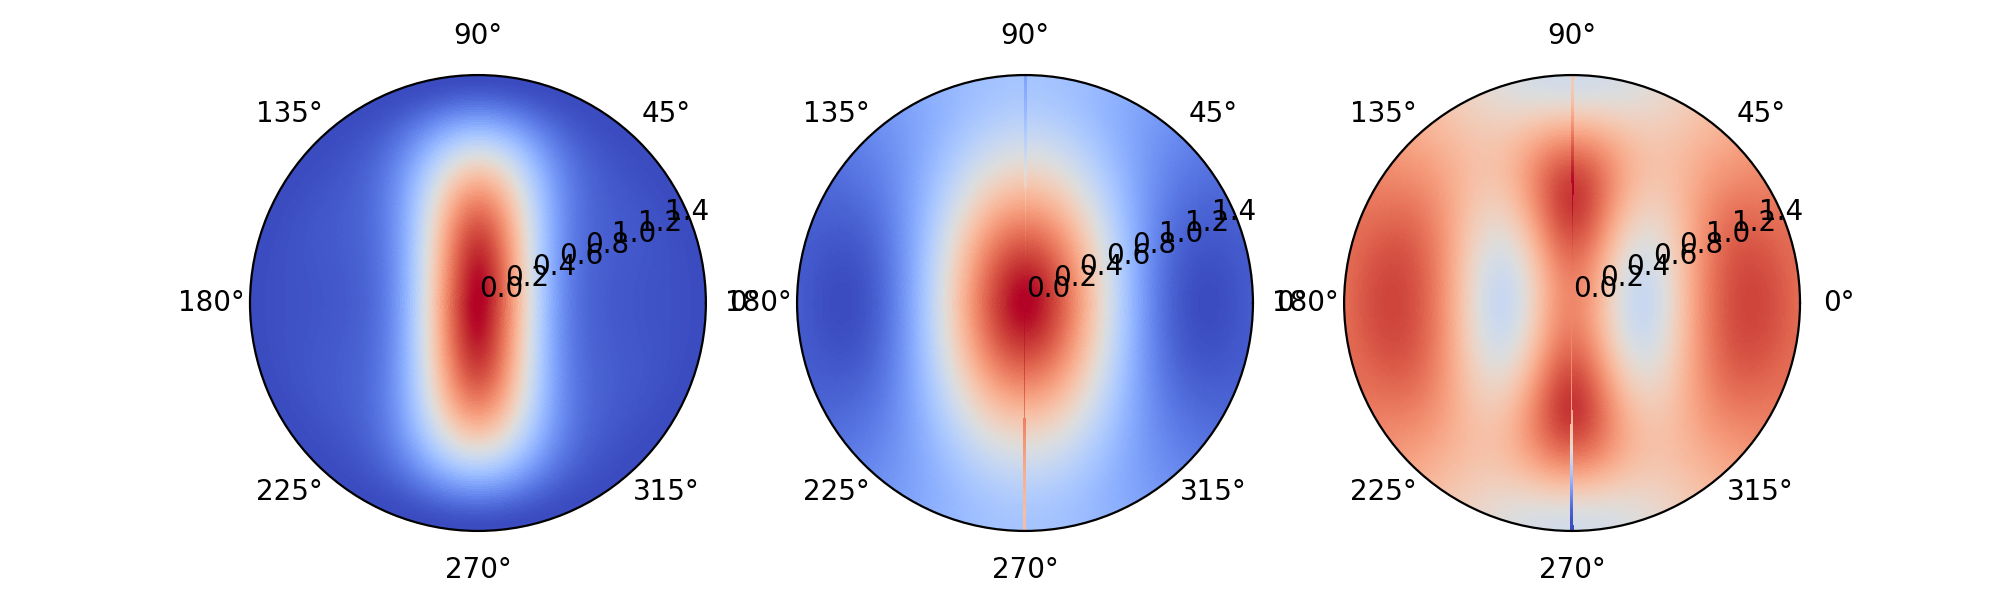

In [126]:
fig, axs = plt.subplots(1, 3, subplot_kw=dict(projection="polar"), figsize = [10,3])
axs[0].pcolormesh(phi*np.pi/180,theta*np.pi/180,gain[100].T,cmap='coolwarm',shading='auto')
axs[1].pcolormesh(phi*np.pi/180,theta*np.pi/180,fittingmodeltotal[2],cmap='coolwarm',shading='auto')
axs[2].pcolormesh(phi*np.pi/180,theta*np.pi/180,frtotal[2],cmap='coolwarm',shading='auto')

In [129]:
newtheta

array([[90.        , 89.        , 88.        , ...,  2.        ,
         1.        ,  0.        ],
       [89.66031038, 88.94388574, 87.97136939, ...,  1.99996484,
         0.99998242,  0.        ],
       [89.3207123 , 88.79112245, 87.8878342 , ...,  1.99985938,
         0.99992971,  0.        ],
       ...,
       [88.98129729, 88.57253728, 87.75559948, ...,  1.99968376,
         0.99984193,  0.        ],
       [89.3207123 , 88.79112245, 87.8878342 , ...,  1.99985938,
         0.99992971,  0.        ],
       [89.66031038, 88.94388574, 87.97136939, ...,  1.99996484,
         0.99998242,  0.        ]])

<IPython.core.display.Javascript object>


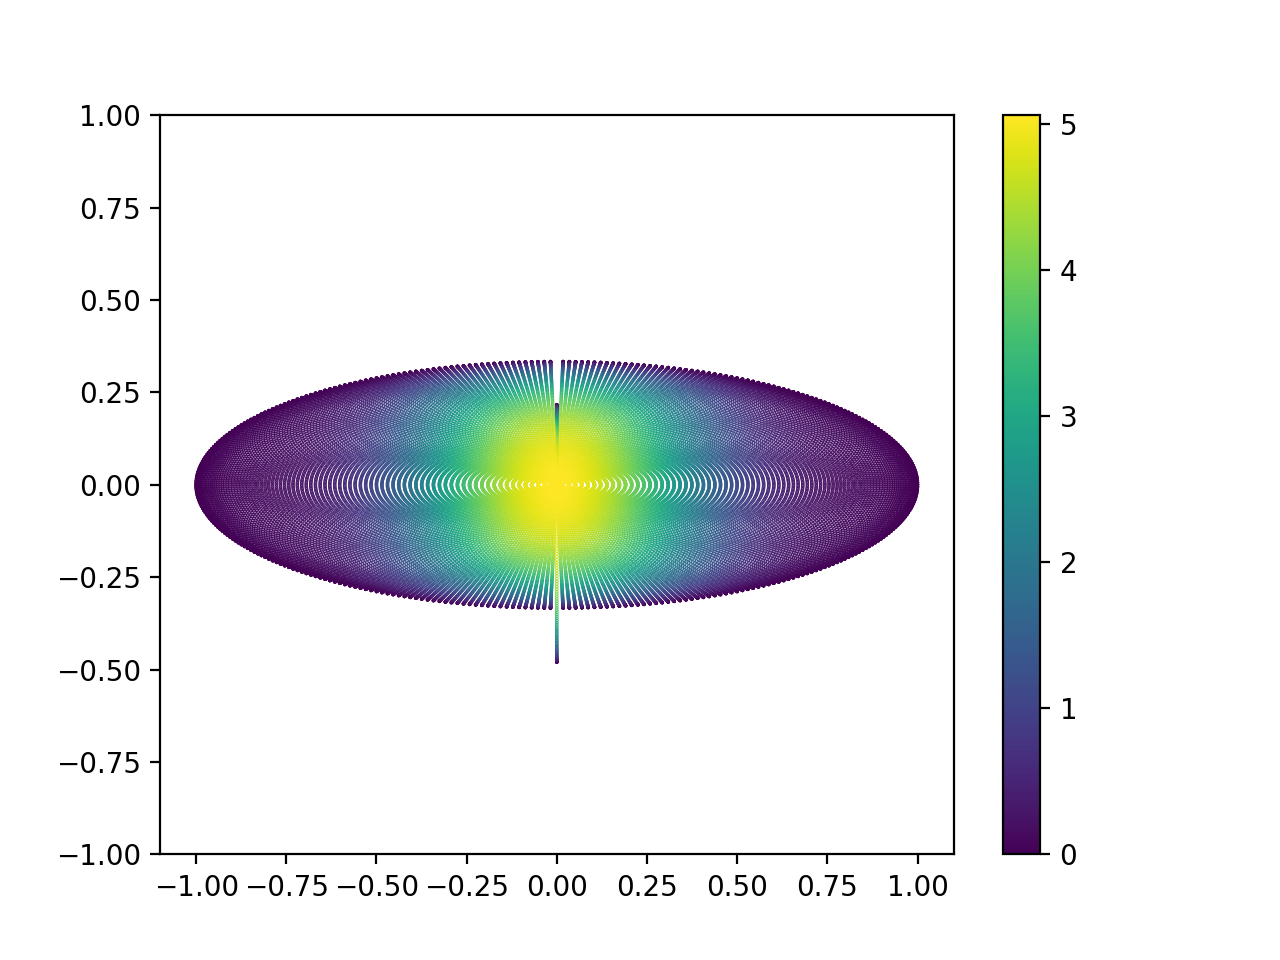

In [169]:
%matplotlib notebook
x = np.cos(phi*np.pi/180)*np.sin(theta*np.pi/180)
y = np.sin(phi*np.pi/180)*np.sin(theta*np.pi/180)
newy = y/3
newphi = np.arctan2(newy,x)
newtheta = np.arcsin(x/np.cos(newphi))
newcx = np.cos(newphi)*np.sin(newtheta)
newcy = np.sin(newphi)*np.sin(newtheta)
sc = plt.scatter(newcx,newcy,c = gain[100].T, s = 0.1)
#plt.xlim(np.min(y),np.max(y))
plt.ylim(-1,1)
plt.colorbar(sc)

In [170]:
newphi = newphi.flatten()
newtheta = newtheta.flatten()

In [178]:
plt.figure(29)
plt.scatter(newphi*180/np.pi,newtheta*180/np.pi,c = gain[0].T.flatten(),s=0.1)

In [ ]:
#obtain ratio from slices
#compress the axis for all frequencies
#compute TDH
#Show residual in 1D cartesian representation
#Do everything in 1D array (change at the beginning)
#plot scatter plots only

In [160]:
ratio

2.600713702771903

<IPython.core.display.Javascript object>


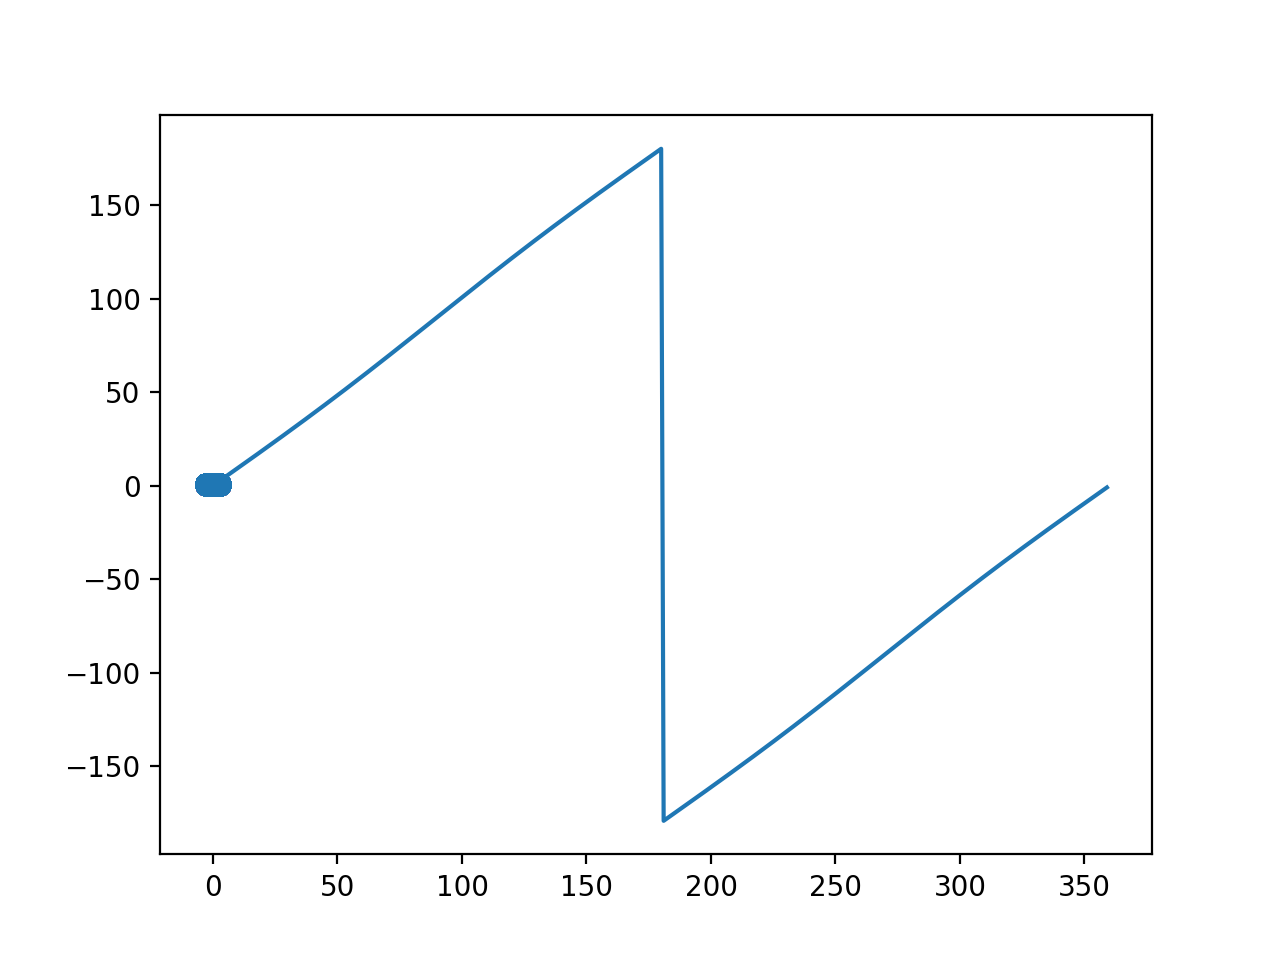

In [141]:
plt.figure(30)
plt.plot(newphi.T[0]*180/np.pi)

In [99]:
#Without using axis trans
pcwithout = pctotal

In [106]:
#For using axis trans
pcwithdiv = pctotal

In [115]:
#For using trig
pctrig = pctotal

In [212]:
TDHcube[5].shape

(32760, 21)

In [320]:
pctotal

[23.449630567900112,
 23.44784894636479,
 12.779305502629235,
 12.771999056819064,
 8.046647053247703,
 7.427101130768153,
 4.740532704695573,
 4.715179951021301,
 3.5205007979061476,
 3.3799198028446242,
 2.9059266749334083,
 2.8329578100677164,
 2.6592350821073922,
 2.6014199915234824,
 2.5184089158177363,
 2.445045876009498,
 347.3523434872273,
 345.3275967846222,
 1723.1086680347964,
 2089.5627205418878]

<IPython.core.display.Javascript object>


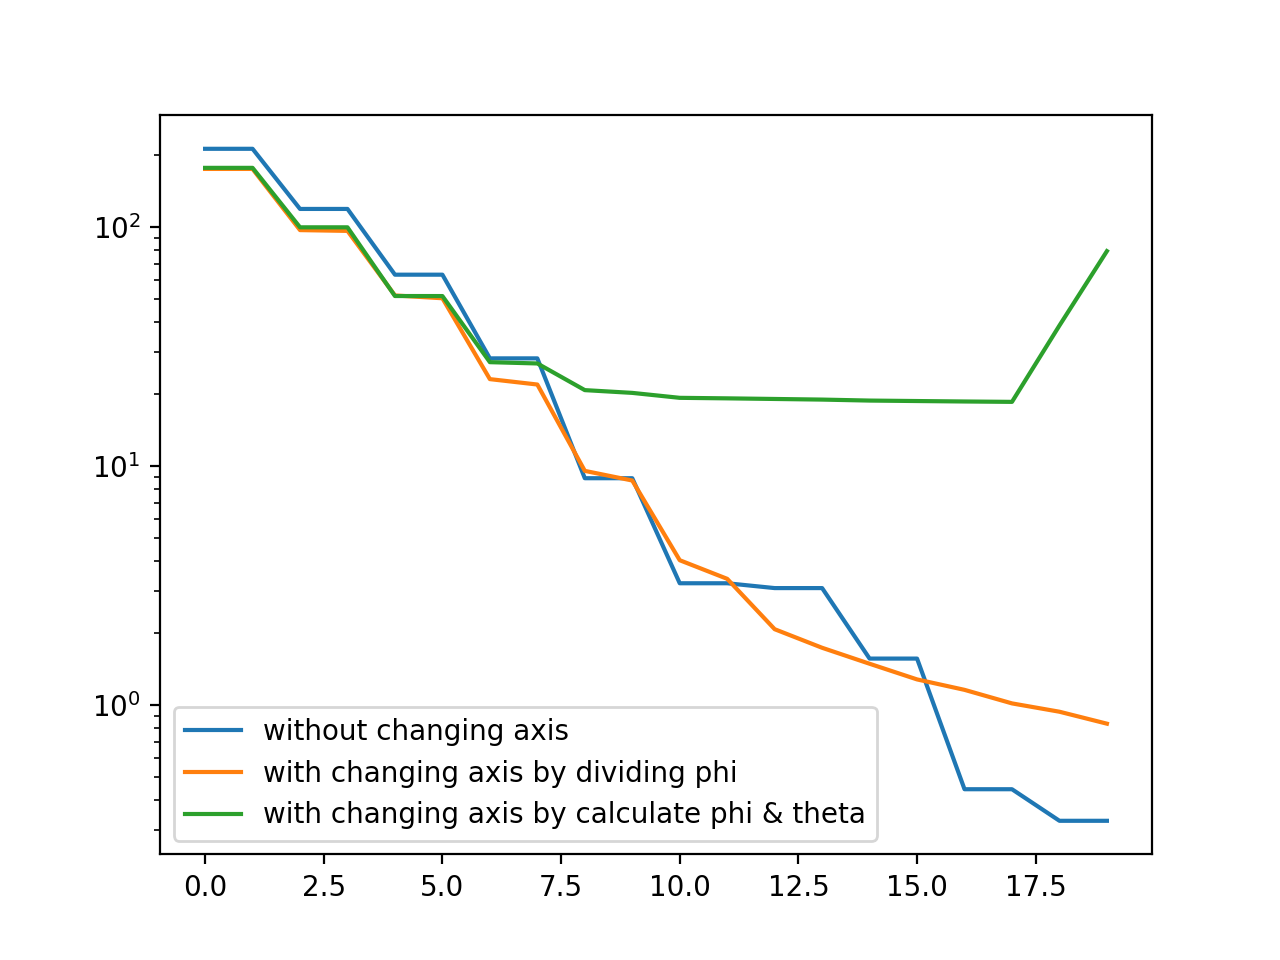

In [124]:
plt.figure(100)
plt.plot(pcwithout, label = "without changing axis")
plt.plot(pcwithdiv, label = "with changing axis by dividing phi")
plt.plot(pctrig, label = "with changing axis by calculate phi & theta")
plt.yscale('log')
plt.legend()
plt.show()

In [342]:
TDHcube[12].shape

(32760, 91)

<IPython.core.display.Javascript object>


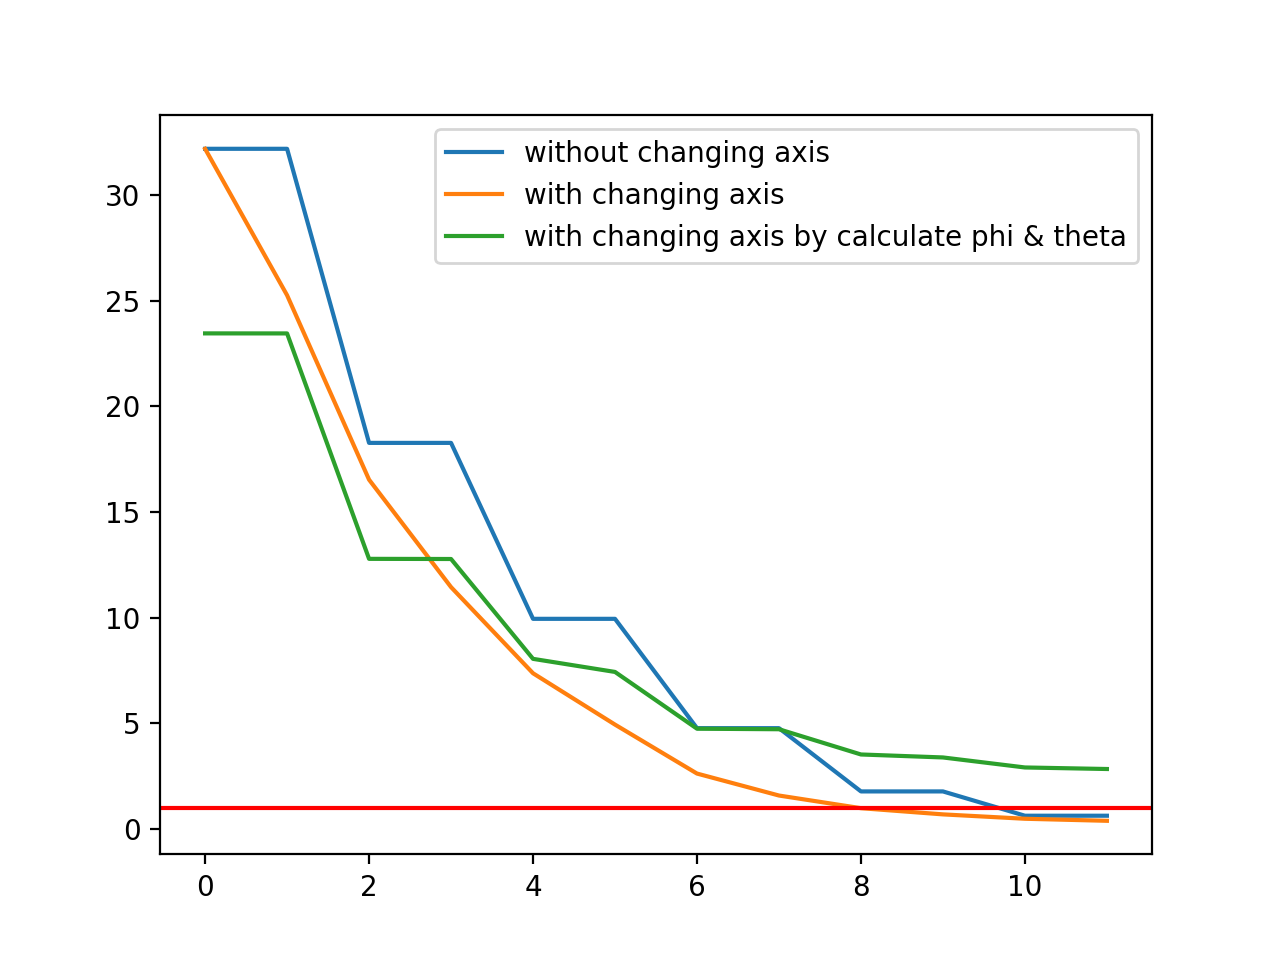

In [339]:
plt.figure(1)
plt.plot(pcwithout[:12], label = "without changing axis")
plt.plot(pcwithdiv[:12], label = "with changing axis")
plt.plot(pctrig[:12], label = "with changing axis by calculate phi & theta")
plt.axhline(y = 1, color = 'r')
plt.legend()

In [343]:
simu(gain[0])

[ultranest] Sampling 200 live points from prior ...


[ultranest] Explored until L=-2e+02  .78 [-185.8438..-185.8437]*| it/evals=4460/9009 eff=50.6300% N=200 0  0  0 0  0 0  
[ultranest] Likelihood function evaluations: 9038
[ultranest]   logZ = -203.5 +- 0.2716
[ultranest] Effective samples strategy satisfied (ESS = 983.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 198 minimum live points (dlogz from 0.22 to 0.62, need <0.5)
[ultranest]   logZ error budget: single: 0.28 bs:0.27 tail:0.01 total:0.27 required:<0.50
[ultranest] done iterating.

logZ = -203.586 +- 0.622
  single instance: logZ = -203.586 +- 0.285
  bootstrapped   : logZ = -203.519 +- 0.622
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    A                   : 0.5267│ ▁  ▁▁▁▁▁▁▁▂▂▄▄▅▇▇▇▅▆▇▇▄▄▄▂▂▂▁▁▁▁▁▁ ▁▁ │0.5440    0.5354 +- 0.0020
    sigx                : 0.6437│ ▁▁ ▁▁▁▁▁▁▂▃▄▄▆▅▅▇▆▇▆▇▅▄▃▂▃▂▁▁▁▁▁▁▁▁▁▁ │0.6799  

<IPython.core.display.Javascript object>


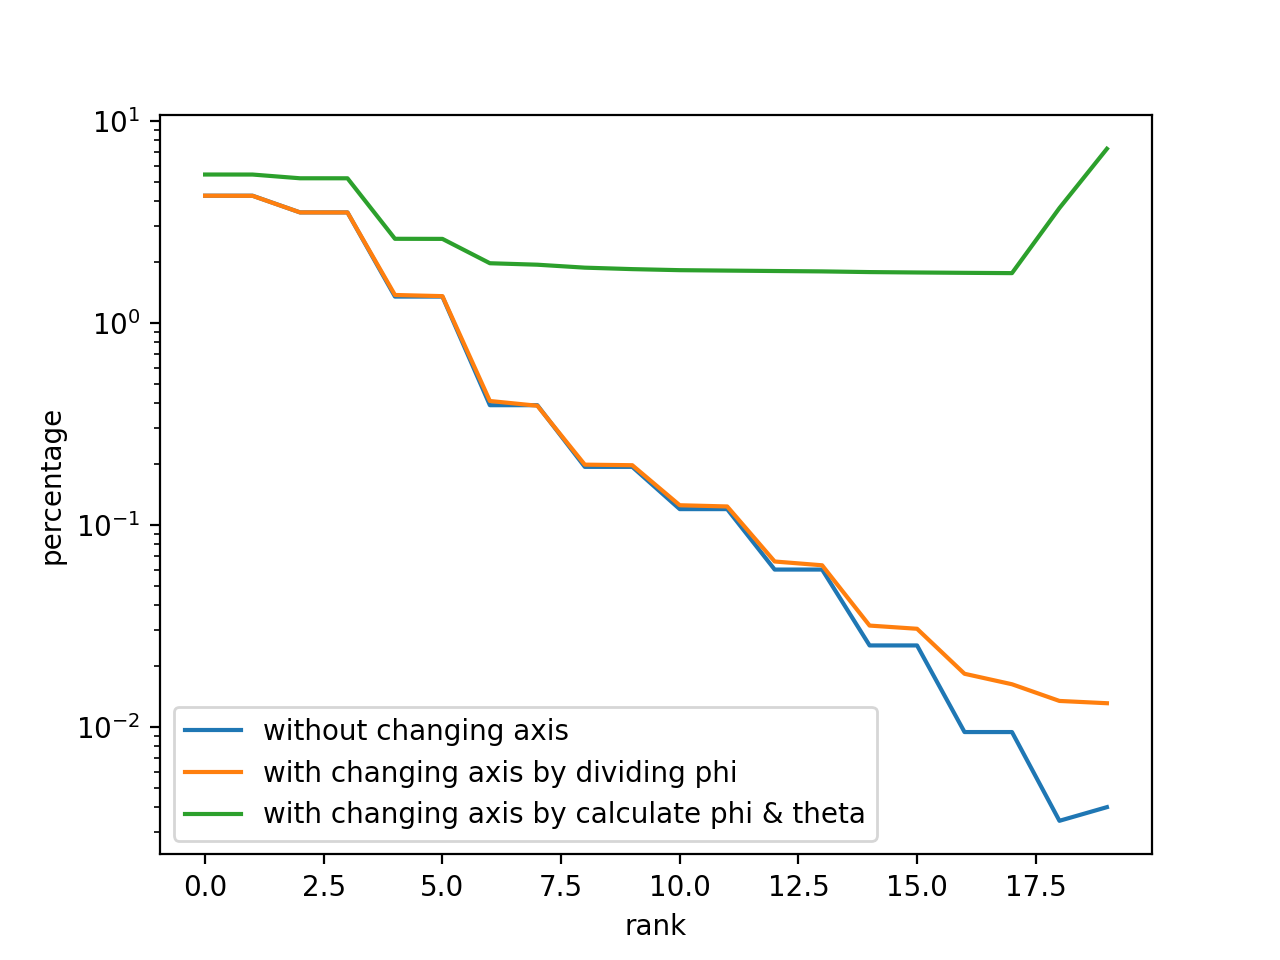

Text(0, 0.5, 'percentage')

In [368]:
plt.figure(2)
plt.plot(pcwithout, label = "without changing axis")
plt.plot(pcwithdiv, label = "with changing axis by dividing phi")
plt.plot(pctrig, label = "with changing axis by calculate phi & theta")
plt.yscale('log')
plt.legend()
plt.xlabel("rank")
plt.ylabel("percentage")

In [371]:
plt.figure(3)
plt.plot(pcwithout[:12], label = "without changing axis")
plt.plot(pcwithdiv[:12], label = "with changing axis")
plt.plot(pctrig[:12], label = "with changing axis by calculate phi & theta")
plt.axhline(y = 1, color = 'r')
plt.legend()